In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import math
import statistics as stat
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls

drive  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')
data.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [ ]:
len(data)

48895

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
arr = []
for col in data.columns :
  if (data[col].dtype == 'int64' or data[col].dtype == 'float64'):
    arr.append(col)

In [ ]:
print(arr)

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
arr.remove('id')
arr.remove('host_id')

In [ ]:
data[arr].describe()

latitude  ...  availability_365
count  48895.000000  ...      48895.000000
mean      40.728949  ...        112.781327
std        0.054530  ...        131.622289
min       40.499790  ...          0.000000
25%       40.690100  ...          0.000000
50%       40.723070  ...         45.000000
75%       40.763115  ...        227.000000
max       40.913060  ...        365.000000

[8 rows x 8 columns]

In [ ]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
for col in data.columns :
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    if col !='latitude' and col != 'longitude':
      up = data[col].mean() + 3*data[col].std()
      low = data[col].mean() - 3*data[col].std()
      mask = (data[col] > up ) | (data[col] < low )
      data = data.drop(data[mask].index)

In [ ]:
len(data)

45743

In [ ]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    data[col] = data[col].fillna(data[col].value_counts().head(1).index[0])

In [ ]:
data.fillna(data._get_numeric_data().mean(),inplace=True)

In [ ]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
4  5022  ...                0
5  5099  ...              129

[5 rows x 16 columns]

In [ ]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(col)
    print(data[col].value_counts())
    print('_______________________________')

name
Hillside Hotel                                       33
Home away from home                                  16
New york Multi-unit building                         13
Brooklyn Apartment                                   12
Private Room                                         11
                                                     ..
Sunny lifestyle room                                  1
Crystal Mediation Sanctuary Prime Williamsburg BK     1
PRIME LOCATION/SUNLIT ROOM 2                          1
7minutesSubway. Maimonides&IndustryCity               1
Darling West Village Studio                           1
Name: name, Length: 44816, dtype: int64
_______________________________
host_name
Michael              392
David                369
John                 284
Alex                 257
Sarah                220
                    ... 
Wenfei                 1
Hector And Miriam      1
Moema                  1
Jeano                  1
Harsha                 1
Name: host_name, Lengt

In [ ]:
data['number_of_reviews'].describe()

count    45743.000000
mean        18.198041
std         29.671892
min          0.000000
25%          1.000000
50%          5.000000
75%         21.000000
max        157.000000
Name: number_of_reviews, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


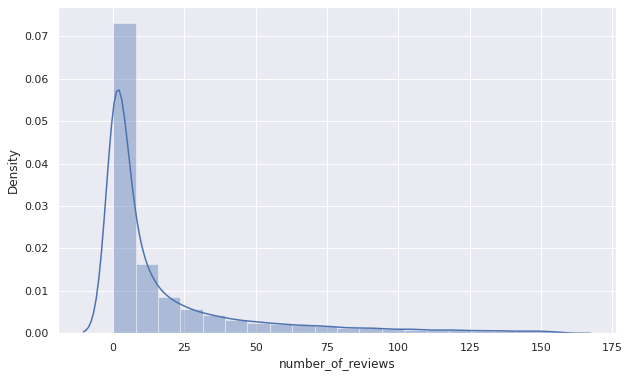

In [ ]:
sb.set(rc={'figure.figsize':(10,6)})
sb.distplot(data['number_of_reviews'],kde_kws={"label": 'number of reviews'}, bins=20)

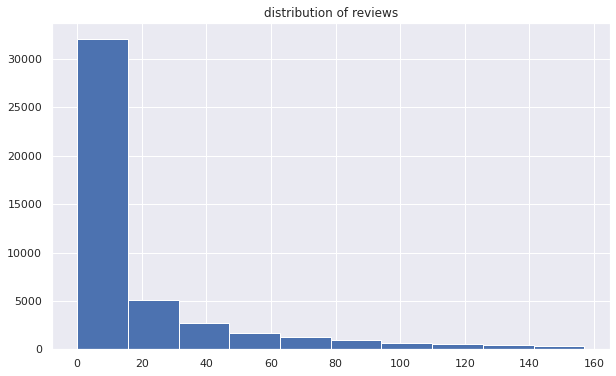

In [ ]:
plt.hist(data['number_of_reviews'])
plt.title('distribution of reviews')
fig = plt.gcf()
fig.set_size_inches(10, 6, forward=True)
plt.show()

In [ ]:
mean = round(stat.mean(data['number_of_reviews']), 2)
med = stat.median(data['number_of_reviews'])
mode = stat.mode(data['number_of_reviews'])
std = stat.stdev(data['number_of_reviews'])

In [ ]:
up = mean + 2*std
low = mean - 2*std
mask = (data['number_of_reviews']<up) & (data['number_of_reviews']>low)

In [ ]:
print('this population is not normal distribution')
print(f'because mean is {mean} , median is {med} and mode is {mode}')
print("in a normal population 96 per cent of the members are within 2 std of the mean.")
print(f'but in this {round(len(data[mask])/len(data)*100,2)} per cent of the members in it'  )

this population is not normal distribution
because mean is 18.2 , median is 5 and mode is 0
in a normal population 96 per cent of the members are within 2 std of the mean.
but in this 93.57 per cent of the members in it


In [ ]:
numOfHouse = []
numOfReview = []
mask = data['neighbourhood_group']=='Manhattan'
print(f'{round(len(data[mask])/len(data)*100,2)} per cent of houses is in Manhattan')
numOfHouse.append(len(data[mask]))
numOfReview.append(sum(data[mask]['number_of_reviews']))
mask = data['neighbourhood_group']=='Brooklyn'
print(f'{round(len(data[mask])/len(data)*100,2)} per cent of houses is in Brooklyn')
numOfHouse.append(len(data[mask]))
numOfReview.append(sum(data[mask]['number_of_reviews']))
mask = data['neighbourhood_group']=='Queens'
print(f'{round(len(data[mask])/len(data)*100,2)} per cent of houses is in Queens')
numOfHouse.append(len(data[mask]))
numOfReview.append(sum(data[mask]['number_of_reviews']))
mask = data['neighbourhood_group']=='Bronx'
print(f'{round(len(data[mask])/len(data)*100,2)} per cent of houses is in Bronx')
numOfHouse.append(len(data[mask]))
numOfReview.append(sum(data[mask]['number_of_reviews']))
mask = data['neighbourhood_group']=='Staten Island'
print(f'{round(len(data[mask])/len(data)*100,2)} per cent of houses is in Staten Island')
numOfHouse.append(len(data[mask]))
numOfReview.append(sum(data[mask]['number_of_reviews']))

43.35 per cent of houses is in Manhattan
42.02 per cent of houses is in Brooklyn
11.6 per cent of houses is in Queens
2.26 per cent of houses is in Bronx
0.77 per cent of houses is in Staten Island


In [ ]:
print(numOfHouse)

[19830, 19221, 5304, 1034, 354]


In [ ]:
roundarr = [round(num/len(data)*100) for num in numOfHouse]

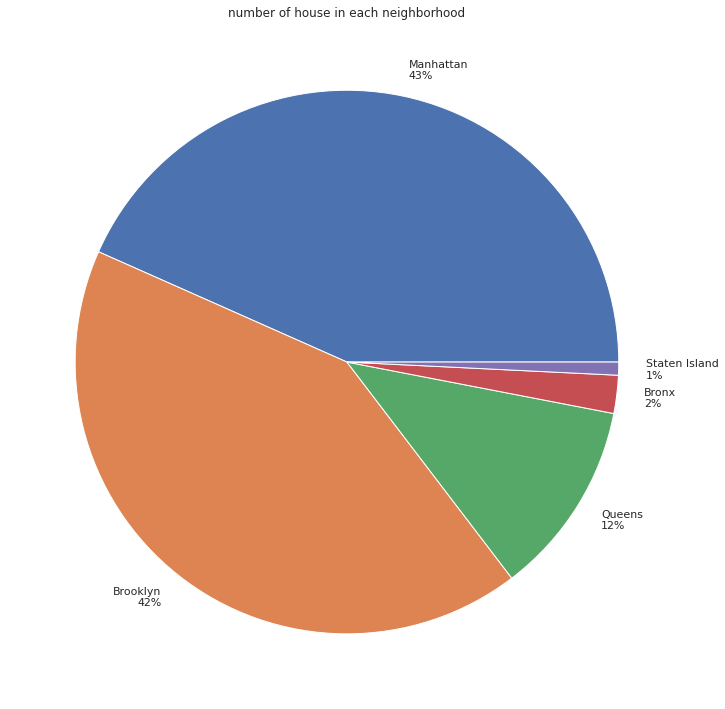

In [ ]:
plt.pie(numOfHouse,labels=[f'Manhattan\n{roundarr[0]}%', f'Brooklyn\n{roundarr[1]}%', f'Queens\n{roundarr[2]}%', f'Bronx\n{roundarr[3]}%', f'Staten Island\n{roundarr[4]}%'])
plt.title('number of house in each neighborhood')
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5, forward=True)
plt.show()

In [ ]:
numOfReview

[331526, 363222, 105769, 22478, 9438]

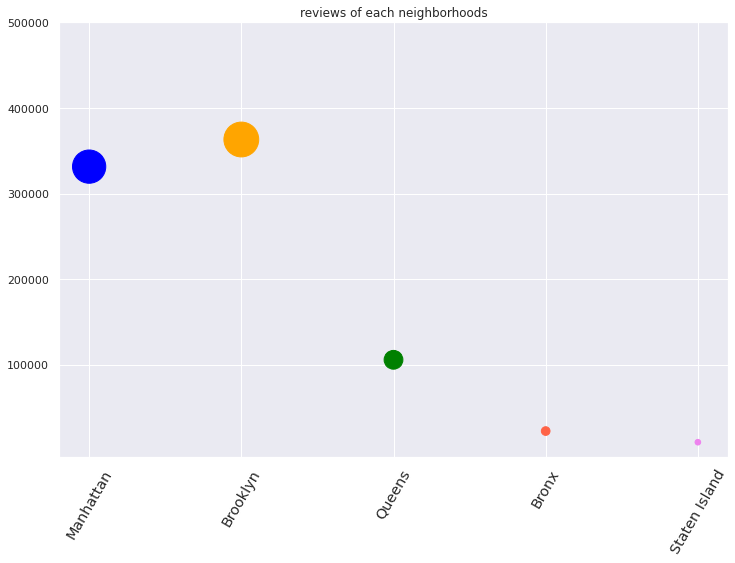

In [ ]:
pop_size = [num/300 for num in numOfReview]
Colors = ['blue', 'orange', 'green', 'tomato', 'violet']
plt.scatter(np.arange(5),numOfReview, s=pop_size,c=Colors, alpha=1)
plt.xticks([0, 1, 2, 3, 4],['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],rotation=60,fontsize='large')
plt.yticks([100000, 200000,300000,400000, 500000])
plt.title('reviews of each neighborhoods')
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

In [ ]:
revPerHouse = []
for review,house in zip(numOfReview,numOfHouse):
  revPerHouse.append(review/house)
print(revPerHouse)

[16.718406454866365, 18.897143749024504, 19.941365007541478, 21.738878143133462, 26.661016949152543]


Text(0.5, 0.98, 'average review of houses in each neighborhood')

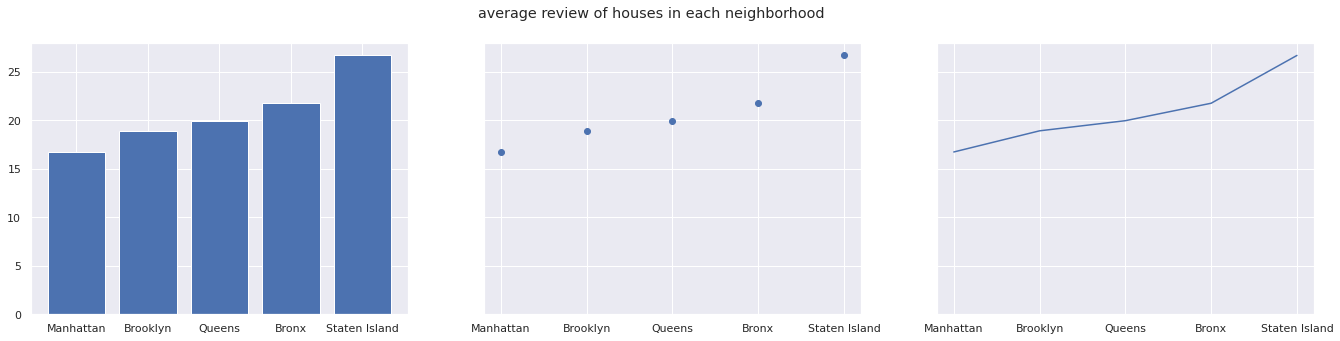

In [ ]:
ave = {'Manhattan':revPerHouse[0], 'Brooklyn': revPerHouse[1], 'Queens': revPerHouse[2], 'Bronx':revPerHouse[3],'Staten Island':revPerHouse[4]}
names = list(ave.keys())
values = list(ave.values())

fig, axs = plt.subplots(1, 3, figsize=(23, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('average review of houses in each neighborhood')

In [ ]:
import urllib

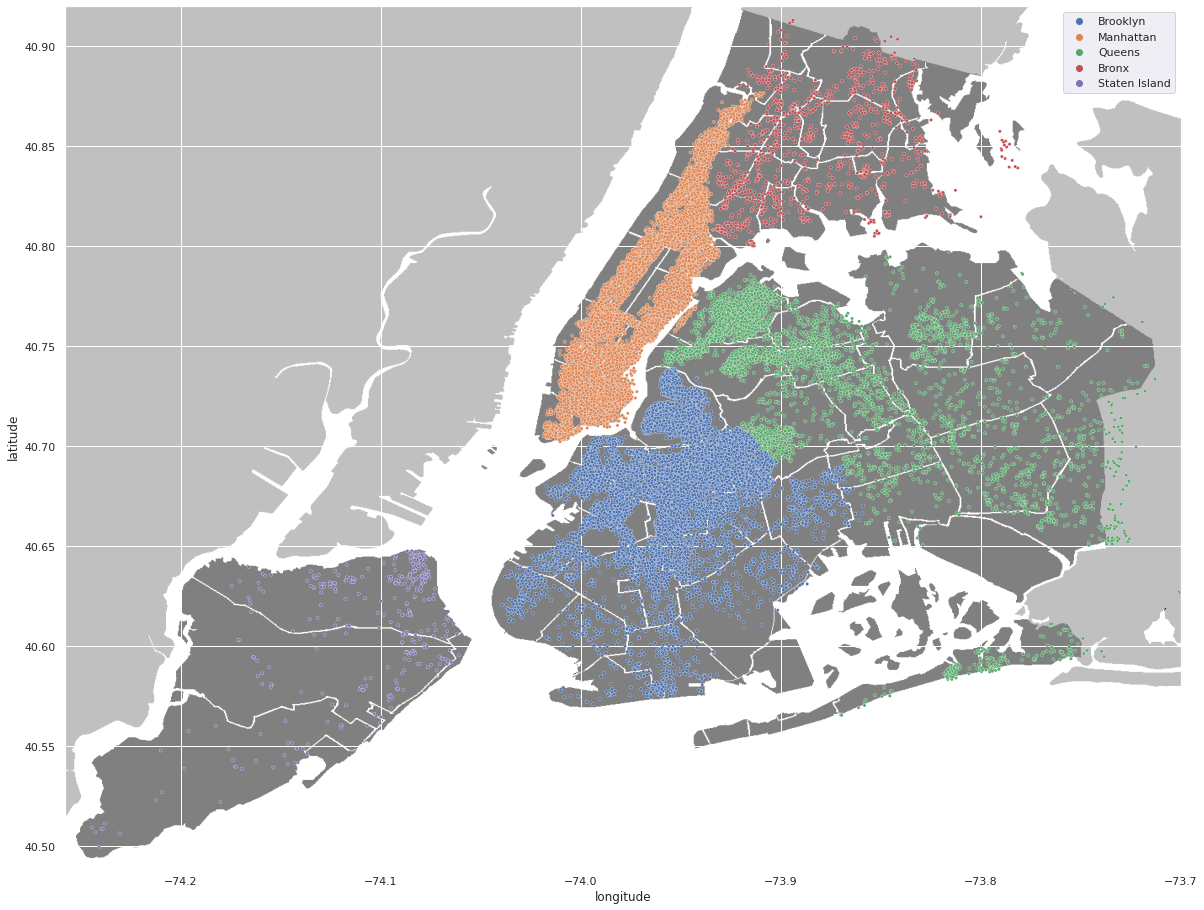

In [ ]:
plt.figure(figsize=(20,20))
pic=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(pic,zorder=0,extent=[-74.258, -73.7, 40.49, 40.92])
sb.scatterplot(x=data['longitude'], y=data['latitude'], hue='neighbourhood_group',s=10, data=data)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


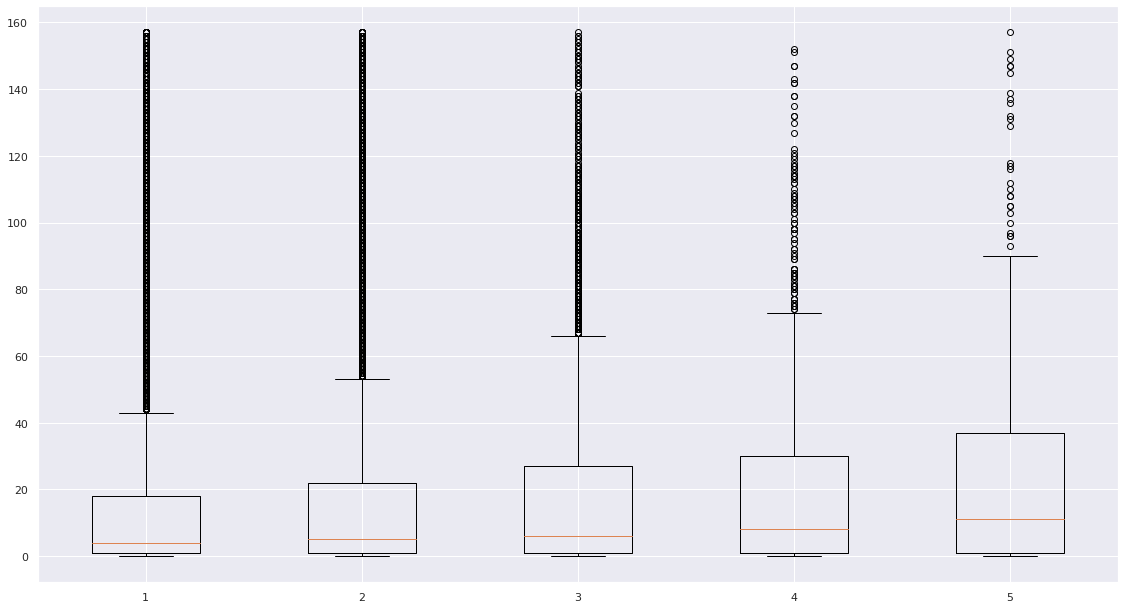

In [ ]:
data_1 = list(data[data['neighbourhood_group']=='Manhattan']['number_of_reviews'])
data_2 = list(data[data['neighbourhood_group']=='Brooklyn']['number_of_reviews'])
data_3 = list(data[data['neighbourhood_group']=='Queens']['number_of_reviews'])
data_4 = list(data[data['neighbourhood_group']=='Bronx']['number_of_reviews'])
data_5 = list(data[data['neighbourhood_group']=='Staten Island']['number_of_reviews'])
newdata = [data_1, data_2, data_3, data_4,data_5]
fig = plt.figure(figsize =(15, 8))


# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(newdata)
 
# show plot
plt.show()

In [ ]:
data[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                        ...                   
                                count       mean        std  ...   50%   75%    max
neighbourhood_group                                          ...                   
Bronx                          1034.0  21.738878  30.774726  ...   8.0  30.0  152.0
Brooklyn                      19221.0  18.897144  30.359137  ...   5.0  22.0  157.0
Manhattan                     19830.0  16.718406  28.732725  ...   4.0  18.0  157.0
Queens                         5304.0  19.941365  29.654287  ...   6.0  27.0  157.0
Staten Island                   354.0  26.661017  35.243118  ...  11.0  37.0  157.0

[5 rows x 8 columns]

In [ ]:
stats.f_oneway(*[data.number_of_reviews[data.neighbourhood_group == s] for s in data.neighbourhood_group.unique()])

F_onewayResult(statistic=30.53171852490601, pvalue=2.030136221721516e-25)

In [ ]:
arr = []
arrstat = []
for i in range(1000):
  firstSample = data[data['neighbourhood_group']=='Manhattan']["number_of_reviews"].sample(200).values
  secSample = data[data['neighbourhood_group']=='Brooklyn']["number_of_reviews"].sample(200).values
  arr.append(stats.ttest_rel(firstSample,secSample)[1])
  arrstat.append(stats.ttest_rel(firstSample,secSample)[0])

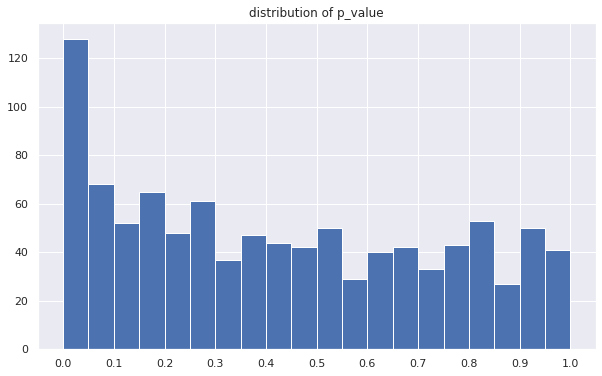

In [ ]:
plt.hist(arr,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('distribution of p_value')
plt.show()

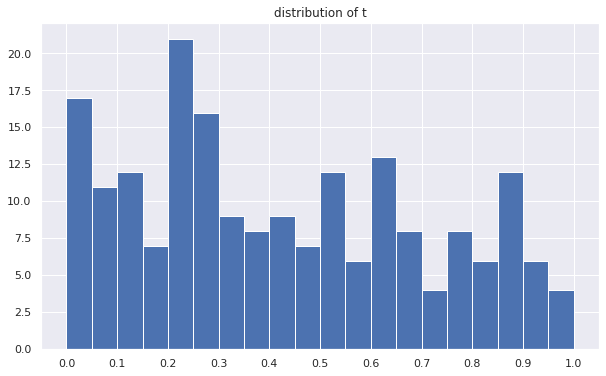

In [ ]:
plt.hist(arrstat,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('distribution of t')
plt.show()

In [ ]:
firstSample = data[data['neighbourhood_group']=='Manhattan']["number_of_reviews"].values
secSample = data[data['neighbourhood_group']=='Brooklyn']["number_of_reviews"].values
stats.ttest_ind(firstSample,secSample)

Ttest_indResult(statistic=-7.2855505900430115, pvalue=3.26404655554297e-13)

In [ ]:
arr = []
for i in range(1000):
  firstSample = data[data['neighbourhood_group']=='Manhattan']["number_of_reviews"].sample(200).values
  secSample = data["number_of_reviews"].sample(200).values
  arr.append(stats.ttest_rel(firstSample,secSample)[1])

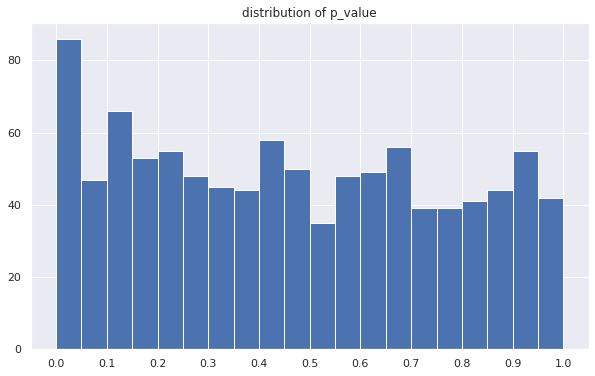

In [ ]:
plt.hist(arr,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('distribution of p_value')
plt.show()

In [ ]:
arr = []
arrstat = []
for i in range(1000):
  firstSample = data[data['neighbourhood_group']=='Manhattan']["number_of_reviews"].sample(200).values
  secSample = data[data['neighbourhood_group']=='Queens']["number_of_reviews"].sample(200).values
  arr.append(stats.ttest_rel(firstSample,secSample)[1])
  arrstat.append(stats.ttest_rel(firstSample,secSample)[0])

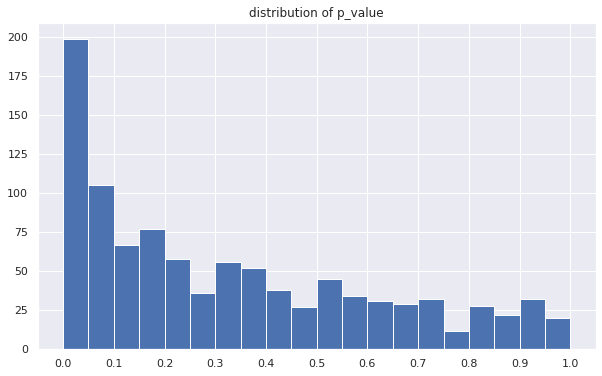

In [ ]:
plt.hist(arr,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('distribution of p_value')
plt.show()

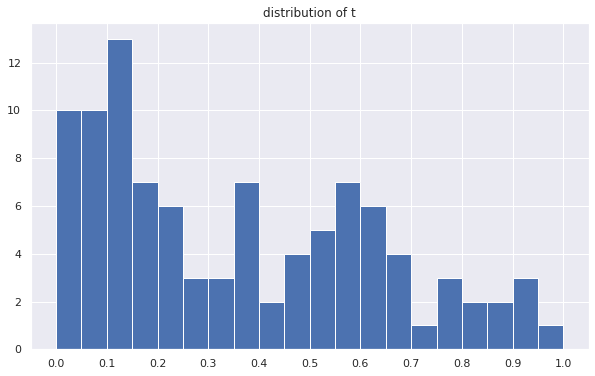

In [ ]:
plt.hist(arrstat,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('distribution of t')
plt.show()

In [ ]:
firstSample = data[data['neighbourhood_group']=='Manhattan']["number_of_reviews"].values
secSample = data[data['neighbourhood_group']=='Queens']["number_of_reviews"].values
stats.ttest_ind(firstSample,secSample)

Ttest_indResult(statistic=-7.206829409384695, pvalue=5.888534559367206e-13)

In [ ]:
data['price'].describe()

count    45743.000000
mean       137.616269
std        107.361853
min          0.000000
25%         68.000000
50%        103.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


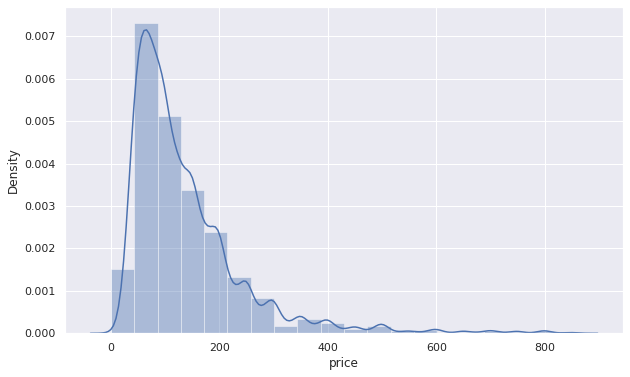

In [ ]:
sb.set(rc={'figure.figsize':(10,6)})
sb.distplot(data['price'],kde_kws={"label": 'price'}, bins=20)

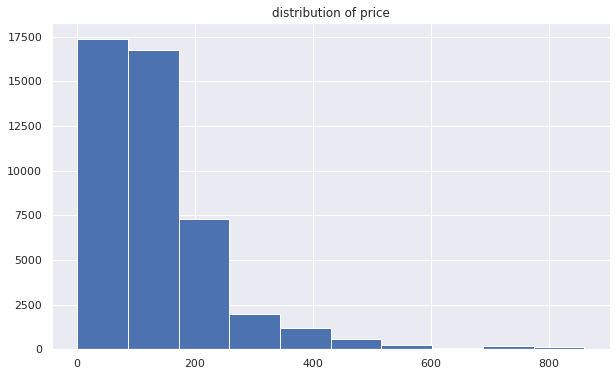

In [ ]:
plt.hist(data['price'])
plt.title('distribution of price')
fig = plt.gcf()
fig.set_size_inches(10, 6, forward=True)
plt.show()

In [ ]:
numOfprice = []
mask = data['neighbourhood_group']=='Manhattan'
numOfprice.append(sum(data[mask]['price']))
mask = data['neighbourhood_group']=='Brooklyn'
numOfprice.append(sum(data[mask]['price']))
mask = data['neighbourhood_group']=='Queens'
numOfprice.append(sum(data[mask]['price']))
mask = data['neighbourhood_group']=='Bronx'
numOfprice.append(sum(data[mask]['price']))
mask = data['neighbourhood_group']=='Staten Island'
numOfprice.append(sum(data[mask]['price']))

In [ ]:
numOfprice

[3425557, 2243278, 503611, 88117, 34418]

In [ ]:
numOfprice = [numOfprice[i]/numOfHouse[i] for i in range(5)]

In [ ]:
numOfprice

[172.74619263741806,
 116.70974455023152,
 94.94928355957768,
 85.21953578336557,
 97.22598870056497]

Text(0.5, 0.98, 'average price of houses in each neighborhood')

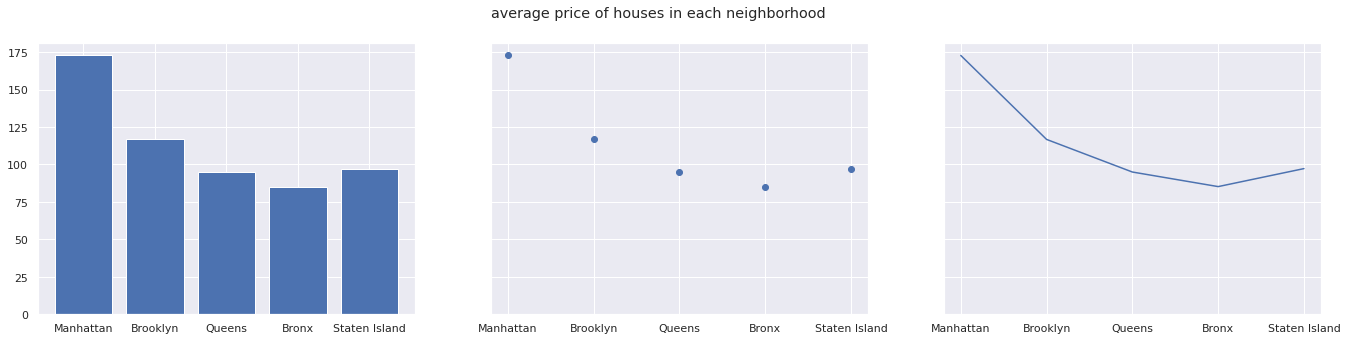

In [ ]:
ave = {'Manhattan':numOfprice[0], 'Brooklyn': numOfprice[1], 'Queens': numOfprice[2], 'Bronx':numOfprice[3],'Staten Island':numOfprice[4]}
names = list(ave.keys())
values = list(ave.values())

fig, axs = plt.subplots(1, 3, figsize=(23, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('average price of houses in each neighborhood')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


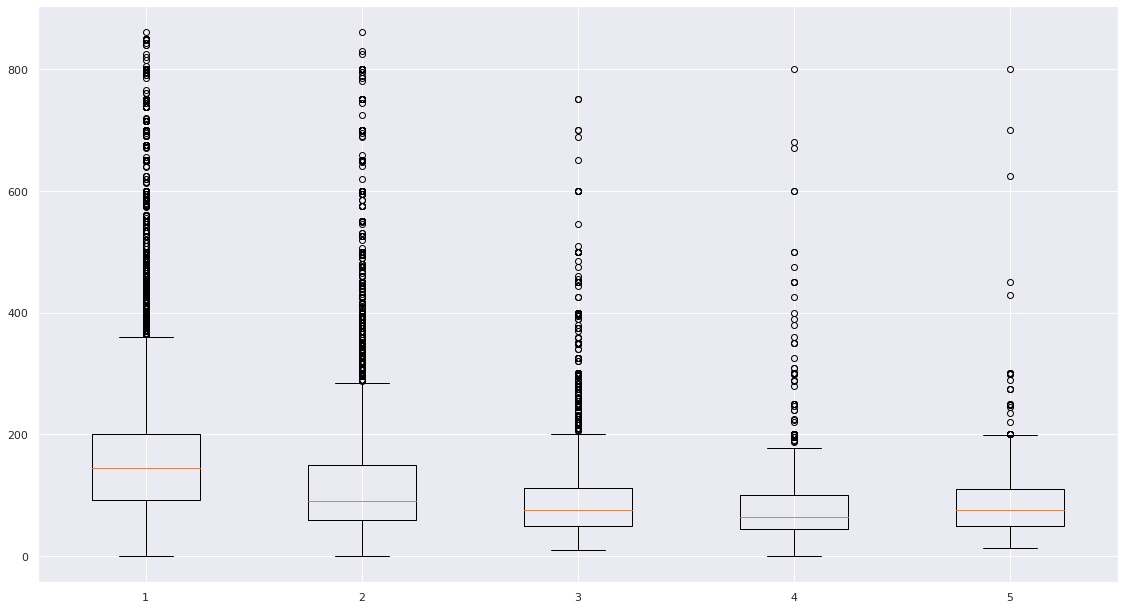

In [ ]:
data_1 = list(data[data['neighbourhood_group']=='Manhattan']['price'])
data_2 = list(data[data['neighbourhood_group']=='Brooklyn']['price'])
data_3 = list(data[data['neighbourhood_group']=='Queens']['price'])
data_4 = list(data[data['neighbourhood_group']=='Bronx']['price'])
data_5 = list(data[data['neighbourhood_group']=='Staten Island']['price'])
newdata = [data_1, data_2, data_3, data_4,data_5]
fig = plt.figure(figsize =(15, 8))


# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(newdata)
 
# show plot
plt.show()

In [ ]:
data[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                          ...                      
                       count        mean         std  ...    50%     75%    max
neighbourhood_group                                   ...                      
Bronx                 1034.0   85.219536   74.140347  ...   65.0   99.75  800.0
Brooklyn             19221.0  116.709745   89.185967  ...   90.0  150.00  860.0
Manhattan            19830.0  172.746193  121.769897  ...  145.0  200.00  860.0
Queens                5304.0   94.949284   70.214812  ...   75.0  111.25  750.0
Staten Island          354.0   97.225989   85.473153  ...   75.0  109.75  800.0

[5 rows x 8 columns]

In [ ]:
arr = []
for i in range(len(data)):
  if data['price'].values[i]<=100:
    arr.append('very cheap')
  elif data['price'].values[i]<=200:
    arr.append('cheap')
  elif data['price'].values[i]<=400:
    arr.append('resonable')
  elif data['price'].values[i]<=600:
    arr.append('expensive')
  else:
    arr.append('very expensive')
data['range_of_price'] = arr

In [ ]:
mask = (data['neighbourhood_group']=='Manhattan') & (data['range_of_price']=='very cheap')
very_cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Manhattan') & (data['range_of_price']=='cheap')
cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Manhattan') & (data['range_of_price']=='resonable')
resonable = len(data[mask])
mask = (data['neighbourhood_group']=='Manhattan') & (data['range_of_price']=='expensive')
expensive = len(data[mask])
mask = (data['neighbourhood_group']=='Manhattan') & (data['range_of_price']=='very expensive')
very_expensive = len(data[mask])

In [ ]:
price = [very_cheap,cheap,resonable,expensive,very_expensive]

In [ ]:
size = len(data[data['neighbourhood_group']=='Manhattan'])

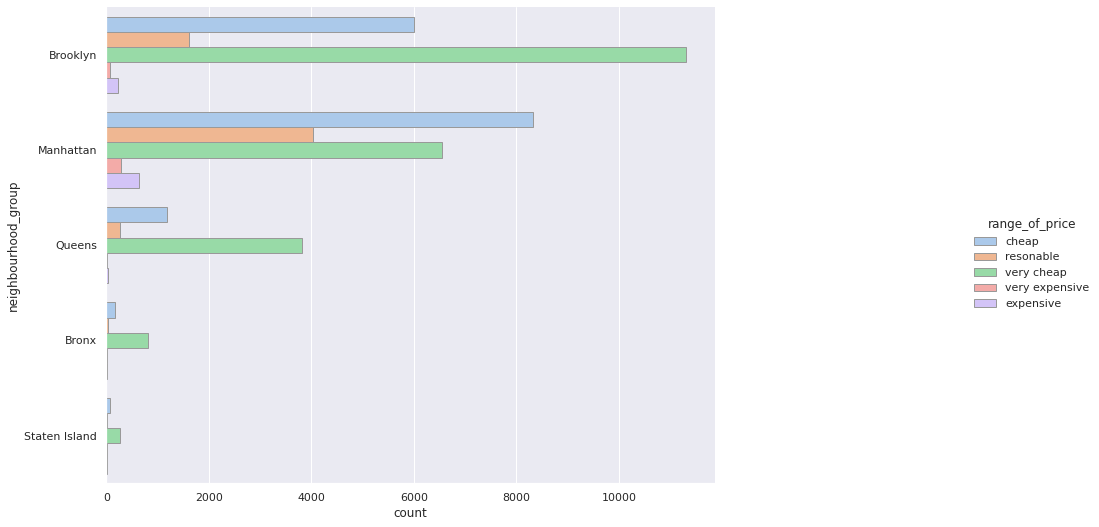

In [ ]:
sb.catplot(y="neighbourhood_group", hue="range_of_price", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.gcf().set_size_inches(20, 8)


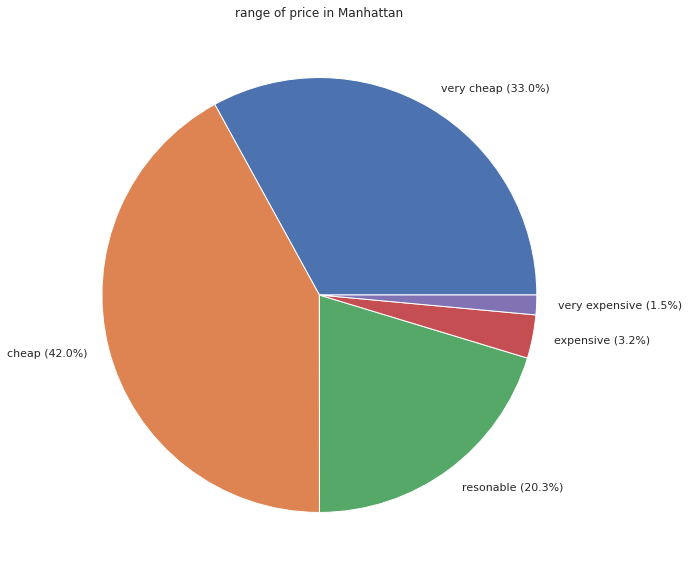

In [ ]:
plt.pie(price,labels=[f'very cheap ({round(price[0]/size*100,1)}%)',
                      f'cheap ({round(price[1]/size*100,1)}%)',
                      f'resonable ({round(price[2]/size*100,1)}%)',
                      f'expensive ({round(price[3]/size*100,1)}%)',
                      f'very expensive ({round(price[4]/size*100,1)}%)'])
plt.title('range of price in Manhattan')
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
plt.show()

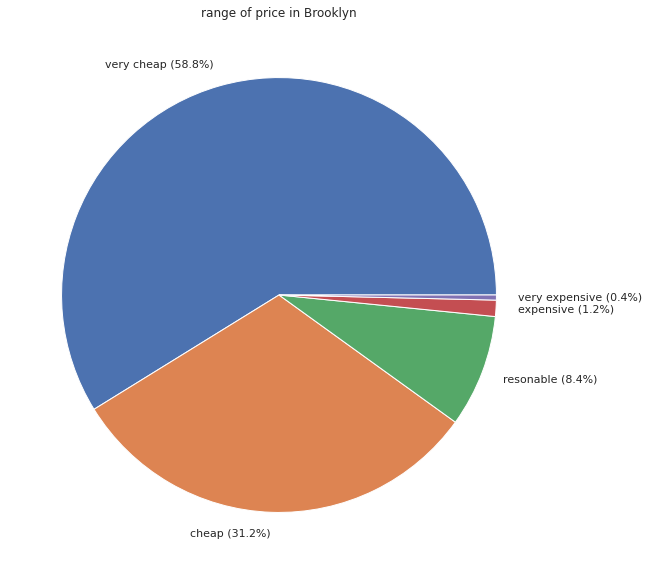

In [ ]:
mask = (data['neighbourhood_group']=='Brooklyn') & (data['range_of_price']=='very cheap')
very_cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Brooklyn') & (data['range_of_price']=='cheap')
cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Brooklyn') & (data['range_of_price']=='resonable')
resonable = len(data[mask])
mask = (data['neighbourhood_group']=='Brooklyn') & (data['range_of_price']=='expensive')
expensive = len(data[mask])
mask = (data['neighbourhood_group']=='Brooklyn') & (data['range_of_price']=='very expensive')
very_expensive = len(data[mask])
price = [very_cheap,cheap,resonable,expensive,very_expensive]
size = len(data[data['neighbourhood_group']=='Brooklyn'])
plt.pie(price,labels=[f'very cheap ({round(price[0]/size*100,1)}%)',
                      f'cheap ({round(price[1]/size*100,1)}%)',
                      f'resonable ({round(price[2]/size*100,1)}%)',
                      f'expensive ({round(price[3]/size*100,1)}%)',
                      f'very expensive ({round(price[4]/size*100,1)}%)'])
plt.title('range of price in Brooklyn')
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
plt.show()

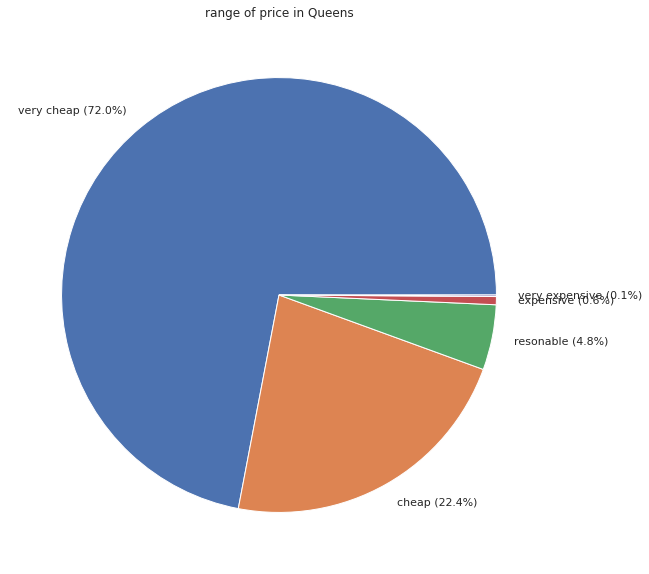

In [ ]:
mask = (data['neighbourhood_group']=='Queens') & (data['range_of_price']=='very cheap')
very_cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Queens') & (data['range_of_price']=='cheap')
cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Queens') & (data['range_of_price']=='resonable')
resonable = len(data[mask])
mask = (data['neighbourhood_group']=='Queens') & (data['range_of_price']=='expensive')
expensive = len(data[mask])
mask = (data['neighbourhood_group']=='Queens') & (data['range_of_price']=='very expensive')
very_expensive = len(data[mask])
price = [very_cheap,cheap,resonable,expensive,very_expensive]
size = len(data[data['neighbourhood_group']=='Queens'])
plt.pie(price,labels=[f'very cheap ({round(price[0]/size*100,1)}%)',
                      f'cheap ({round(price[1]/size*100,1)}%)',
                      f'resonable ({round(price[2]/size*100,1)}%)',
                      f'expensive ({round(price[3]/size*100,1)}%)',
                      f'very expensive ({round(price[4]/size*100,1)}%)'])
plt.title('range of price in Queens')
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
plt.show()

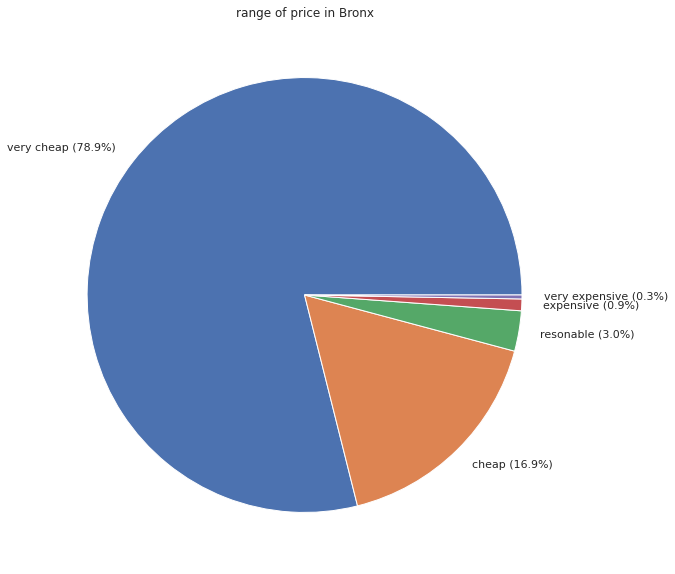

In [ ]:
mask = (data['neighbourhood_group']=='Bronx') & (data['range_of_price']=='very cheap')
very_cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Bronx') & (data['range_of_price']=='cheap')
cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Bronx') & (data['range_of_price']=='resonable')
resonable = len(data[mask])
mask = (data['neighbourhood_group']=='Bronx') & (data['range_of_price']=='expensive')
expensive = len(data[mask])
mask = (data['neighbourhood_group']=='Bronx') & (data['range_of_price']=='very expensive')
very_expensive = len(data[mask])
price = [very_cheap,cheap,resonable,expensive,very_expensive]
size = len(data[data['neighbourhood_group']=='Bronx'])
plt.pie(price,labels=[f'very cheap ({round(price[0]/size*100,1)}%)',
                      f'cheap ({round(price[1]/size*100,1)}%)',
                      f'resonable ({round(price[2]/size*100,1)}%)',
                      f'expensive ({round(price[3]/size*100,1)}%)',
                      f'very expensive ({round(price[4]/size*100,1)}%)'])
plt.title('range of price in Bronx')
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
plt.show()

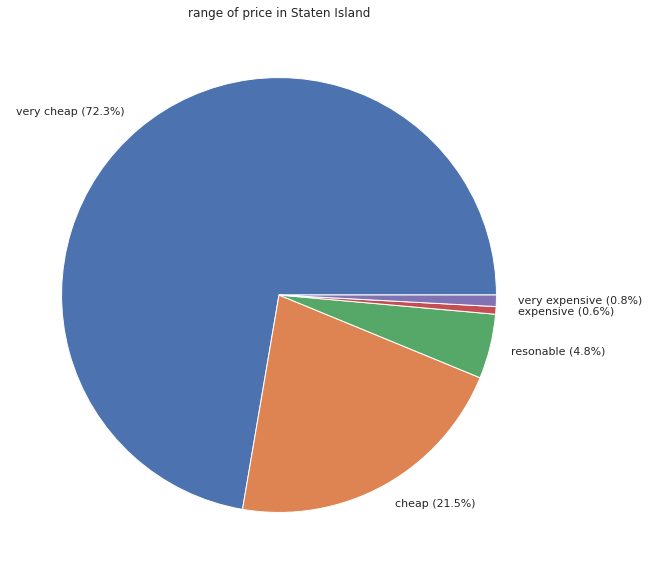

In [ ]:
mask = (data['neighbourhood_group']=='Staten Island') & (data['range_of_price']=='very cheap')
very_cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Staten Island') & (data['range_of_price']=='cheap')
cheap = len(data[mask])
mask = (data['neighbourhood_group']=='Staten Island') & (data['range_of_price']=='resonable')
resonable = len(data[mask])
mask = (data['neighbourhood_group']=='Staten Island') & (data['range_of_price']=='expensive')
expensive = len(data[mask])
mask = (data['neighbourhood_group']=='Staten Island') & (data['range_of_price']=='very expensive')
very_expensive = len(data[mask])
price = [very_cheap,cheap,resonable,expensive,very_expensive]
size = len(data[data['neighbourhood_group']=='Staten Island'])
plt.pie(price,labels=[f'very cheap ({round(price[0]/size*100,1)}%)',
                      f'cheap ({round(price[1]/size*100,1)}%)',
                      f'resonable ({round(price[2]/size*100,1)}%)',
                      f'expensive ({round(price[3]/size*100,1)}%)',
                      f'very expensive ({round(price[4]/size*100,1)}%)'])
plt.title('range of price in Staten Island')
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
plt.show()

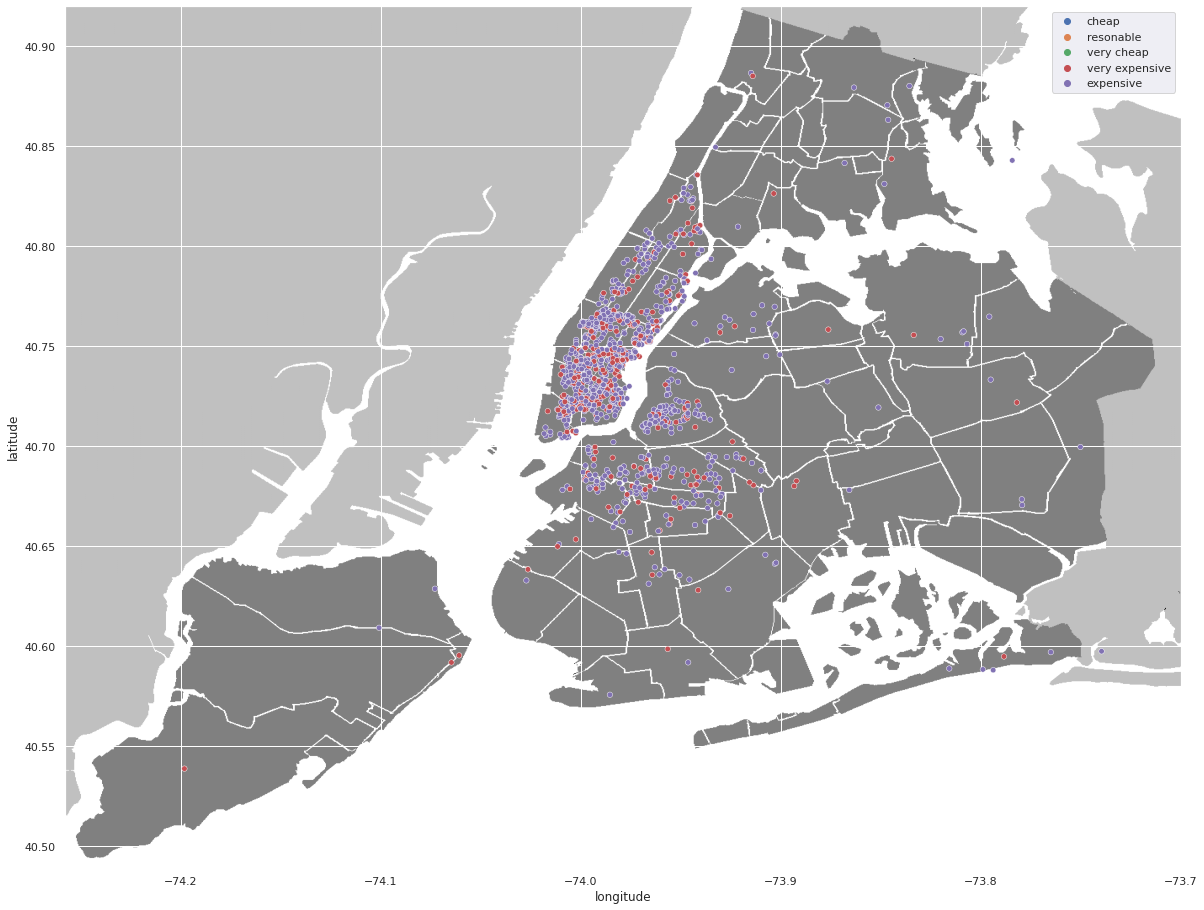

In [ ]:
mask = (data['range_of_price'] == 'expensive') | (data['range_of_price'] == 'very expensive')
plt.figure(figsize=(20,20))
pic=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(pic,zorder=0,extent=[-74.258, -73.7, 40.49, 40.92])
sb.scatterplot(x=data[mask]['longitude'], y=data[mask]['latitude'],hue='range_of_price',s=30, data=data)
plt.legend()
plt.show()

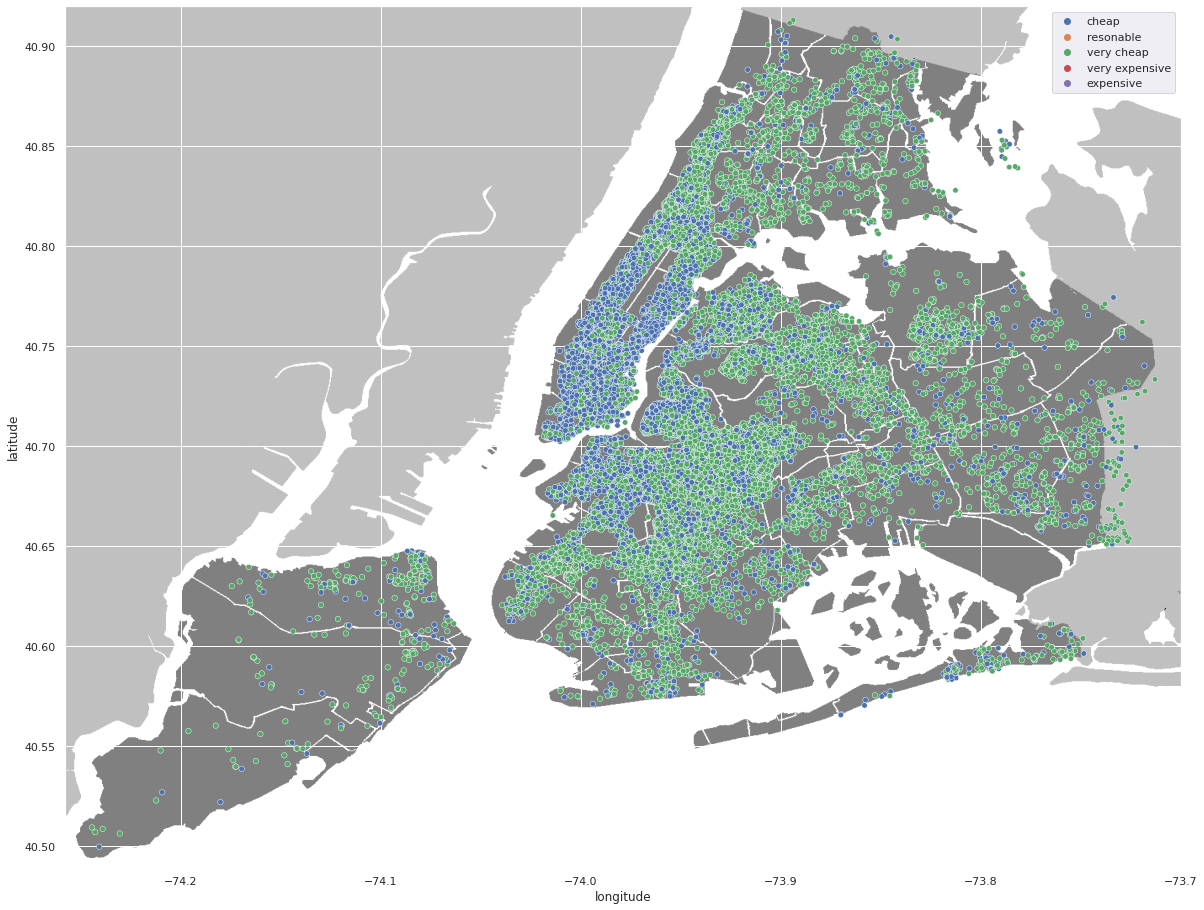

In [ ]:
mask = (data['range_of_price'] == 'cheap') | (data['range_of_price'] == 'very cheap')
plt.figure(figsize=(20,20))
pic=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(pic,zorder=0,extent=[-74.258, -73.7, 40.49, 40.92])
sb.scatterplot(x=data[mask]['longitude'], y=data[mask]['latitude'], hue='range_of_price',s=30, data=data)
plt.legend()
plt.show()

In [ ]:
stats.f_oneway(*[data.price[data.neighbourhood_group == s] for s in data.neighbourhood_group.unique()])

F_onewayResult(statistic=1091.5493275441468, pvalue=0.0)

In [ ]:
arr = []
for i in range(1000):
  firstSample = data[data['neighbourhood_group']=='Manhattan']["price"].sample(200).values
  secSample = data[data['neighbourhood_group']=='Brooklyn']["price"].sample(200).values
  arr.append(stats.ttest_rel(firstSample,secSample)[1])

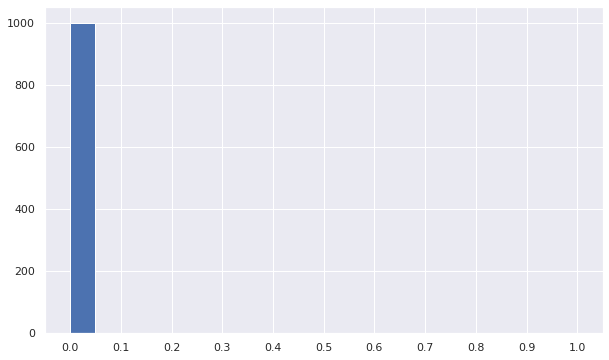

In [ ]:
plt.hist(arr,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

In [ ]:
arr = []
for i in range(1000):
  firstSample = data[data['neighbourhood_group']=='Manhattan']["price"].sample(200).values
  secSample = data[data['neighbourhood_group']=='Queens']["price"].sample(200).values
  arr.append(stats.ttest_rel(firstSample,secSample)[1])

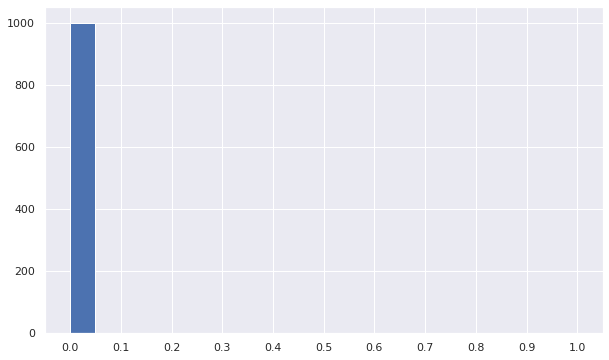

In [ ]:
plt.hist(arr,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

In [ ]:
arr = []
for i in range(len(data)):
  if data['availability_365'].values[i]<=121:
    arr.append('busy')
  elif data['availability_365'].values[i]<=242:
    arr.append('moderate')
  else:
    arr.append('free')
data['busyness'] = arr

In [ ]:
data.head()

id  ...  busyness
0  2539  ...      free
1  2595  ...      free
2  3647  ...      free
4  5022  ...      busy
5  5099  ...  moderate

[5 rows x 18 columns]

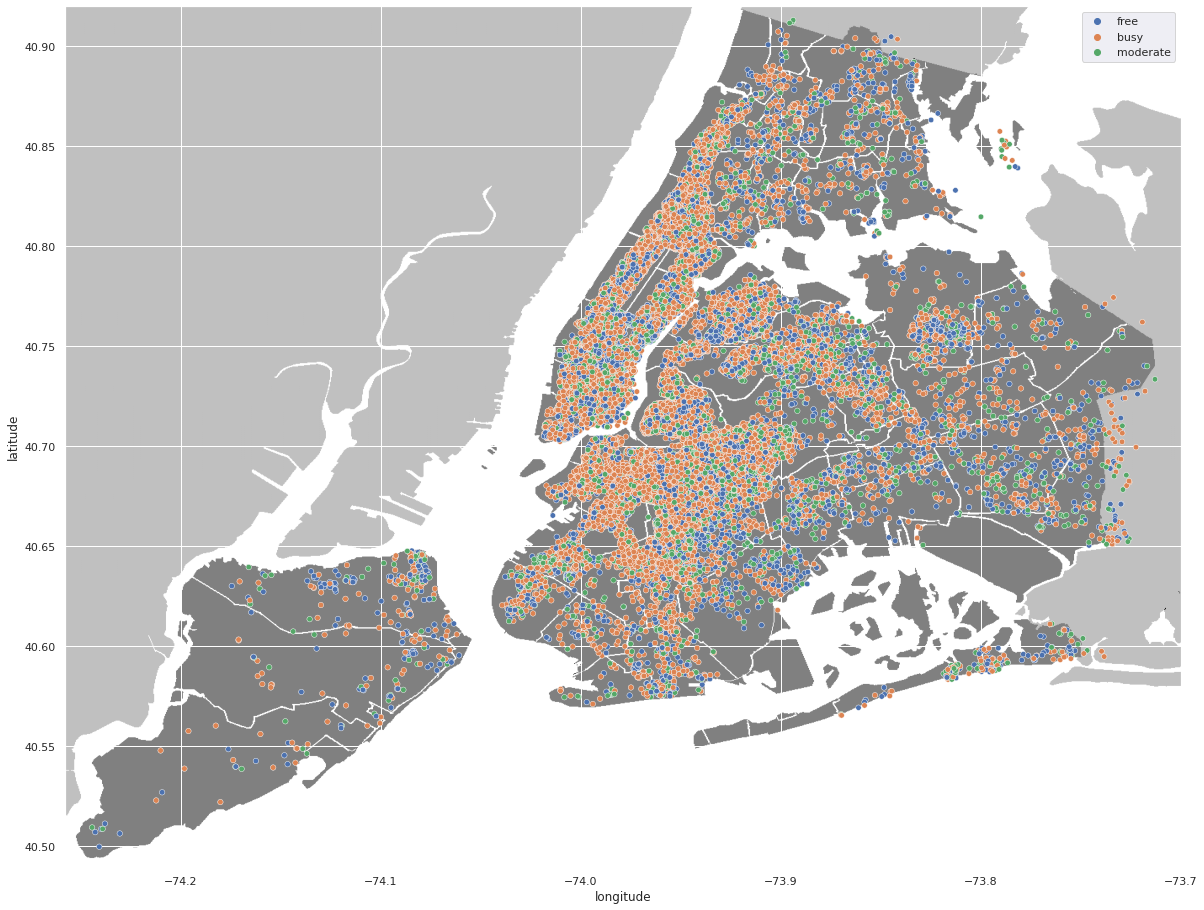

In [ ]:
plt.figure(figsize=(20,20))
pic=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(pic,zorder=0,extent=[-74.258, -73.7, 40.49, 40.92])
sb.scatterplot(x=data['longitude'], y=data['latitude'], hue='busyness',s=30, data=data)
plt.legend()
plt.show()

In [ ]:
arr=[]
neighborhoods_G=['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
i = 0
for s in neighborhoods_G:
  mask = (data['neighbourhood_group'] == s) & (data['busyness'] == "busy")
  arr.append(round(len(data[mask])/numOfHouse[i],1))
  i = i +1

In [ ]:
arr

[0.7, 0.7, 0.5, 0.5, 0.4]

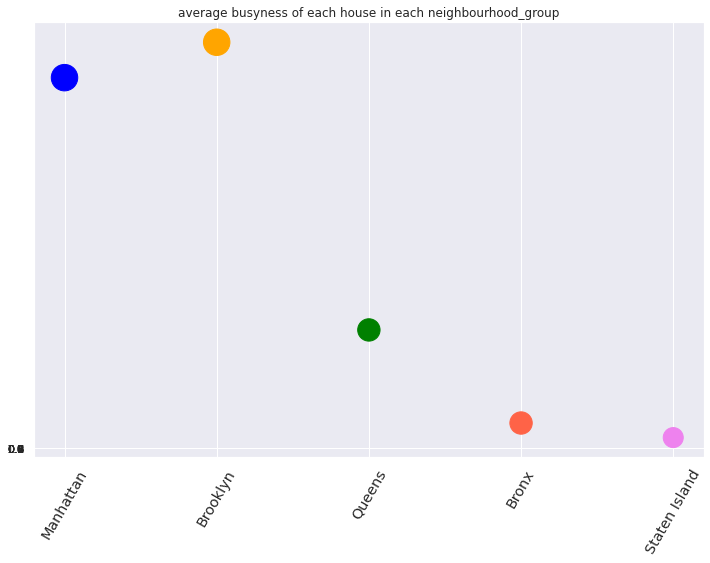

In [ ]:
pop_size = [num*1000 for num in arr]
Colors = ['blue', 'orange', 'green', 'tomato', 'violet']
plt.scatter(np.arange(5),numOfReview, s=pop_size,c=Colors, alpha=1)
plt.xticks([0, 1, 2, 3, 4],['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],rotation=60,fontsize='large')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('average busyness of each house in each neighbourhood_group')
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

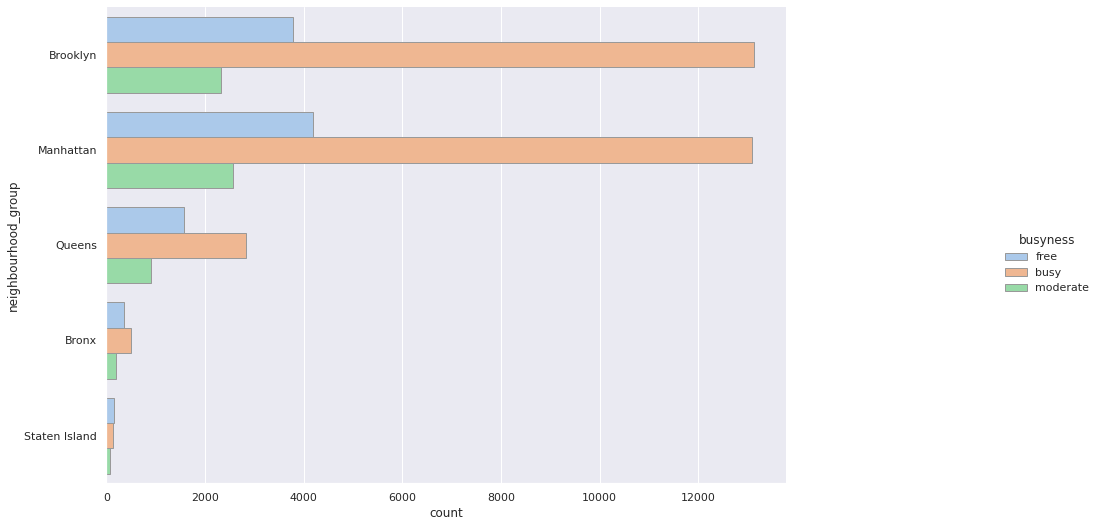

In [ ]:
sb.catplot(y="neighbourhood_group", hue="busyness", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.gcf().set_size_inches(20, 8)


In [ ]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
arr = []
mask = data['room_type'] == 'Private room'
arr.append(stat.mean(data[mask]['price'].values))
mask = data['room_type'] == 'Entire home/apt'
arr.append(stat.mean(data[mask]['price'].values))
mask = data['room_type'] == 'Shared room'
arr.append(stat.mean(data[mask]['price'].values))

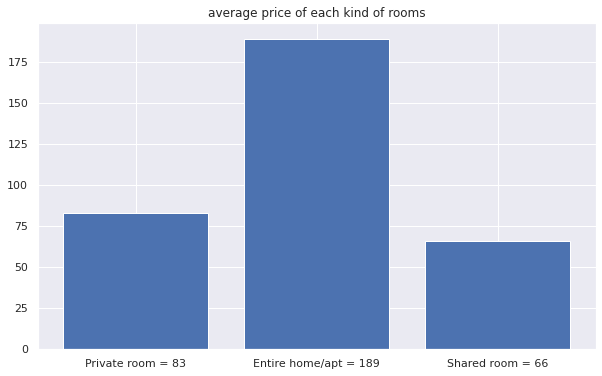

In [ ]:
plt.bar(x = [f'Private room = {arr[0]}',f'Entire home/apt = {arr[1]}',f'Shared room = {arr[2]}'],height=arr)
plt.title('average price of each kind of rooms')
plt.show()

In [ ]:
stats.f_oneway(*[data['price'][data['room_type'] == s] for s in data['room_type'].unique()])

F_onewayResult(statistic=7603.838752411991, pvalue=0.0)

In [ ]:
arr = []
mask = data['room_type'] == 'Private room'
arr.append(stat.mean(data[mask]['number_of_reviews'].values))
mask = data['room_type'] == 'Entire home/apt'
arr.append(stat.mean(data[mask]['number_of_reviews'].values))
mask = data['room_type'] == 'Shared room'
arr.append(stat.mean(data[mask]['number_of_reviews'].values))

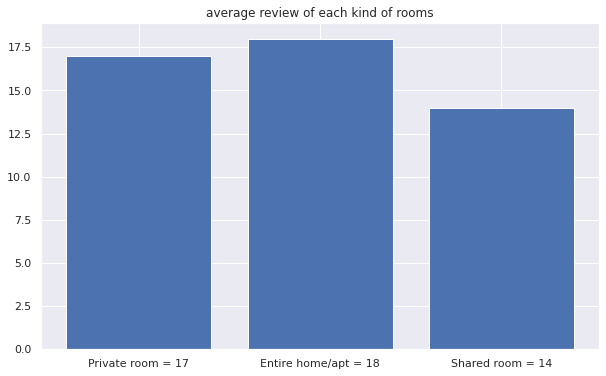

In [ ]:
plt.bar(x = [f'Private room = {arr[0]}',f'Entire home/apt = {arr[1]}',f'Shared room = {arr[2]}'],height=arr)
plt.title('average review of each kind of rooms')
plt.show()

In [ ]:
stats.f_oneway(*[data['number_of_reviews'][data['room_type'] == s] for s in data['room_type'].unique()])

F_onewayResult(statistic=17.597552975292952, pvalue=2.2930770493237693e-08)

In [ ]:
data.head()

id  ...  busyness
0  2539  ...      free
1  2595  ...      free
2  3647  ...      free
4  5022  ...      busy
5  5099  ...  moderate

[5 rows x 18 columns]

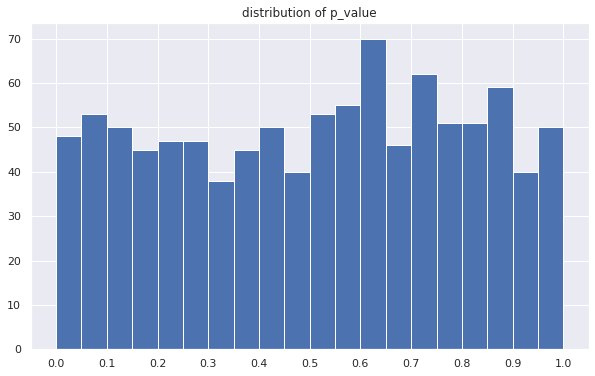

In [ ]:
arr = []
arrcor= []
for i in range(1000):
  firstSample = data['price'].sample(200).values
  secSample = data['number_of_reviews'].sample(200).values
  arrcor.append(stats.spearmanr(firstSample,secSample)[0])
  arr.append(stats.spearmanr(firstSample,secSample)[1])
plt.hist(arr,[x*0.05 for x in list(range(21))])
plt.title('distribution of p_value')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

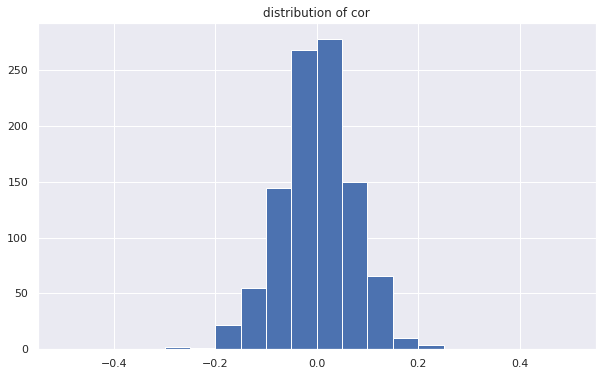

In [ ]:
plt.hist(arrcor,[x*0.05-0.5 for x in list(range(21))])
plt.title('distribution of cor')
plt.show()

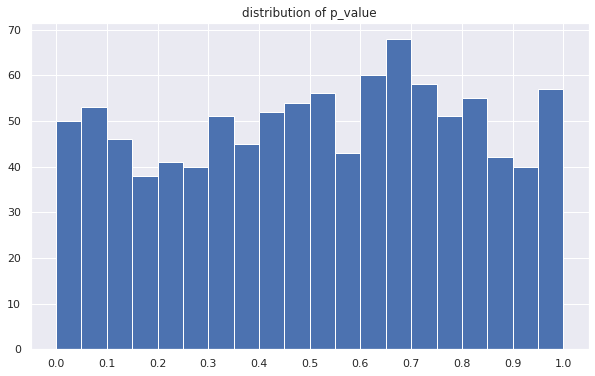

In [ ]:
arr = []
arrcor= []
for i in range(1000):
  firstSample = data['availability_365'].sample(200).values
  secSample = data['number_of_reviews'].sample(200).values
  arrcor.append(stats.spearmanr(firstSample,secSample)[0])
  arr.append(stats.spearmanr(firstSample,secSample)[1])
plt.hist(arr,[x*0.05 for x in list(range(21))])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('distribution of p_value')
plt.show()

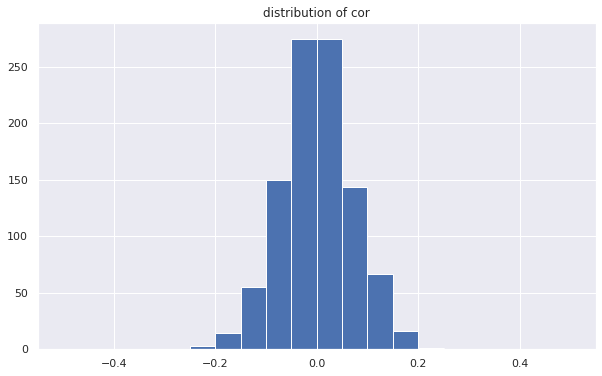

In [ ]:
plt.hist(arrcor,[x*0.05-0.5 for x in list(range(21))])
plt.title('distribution of cor')
plt.show()

In [ ]:
arr = []
for x in list(data['last_review'].values):
  arr.append(int(x[0:4]))

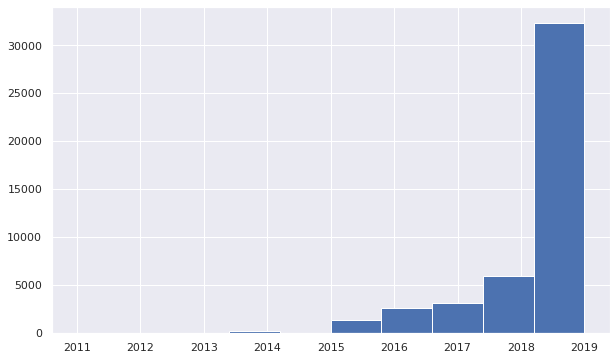

In [ ]:
plt.hist(arr)
plt.show()

In [ ]:
data['last_review'] = arr

In [ ]:
data['status'] = 'good'

In [ ]:
for i in range(len(arr)):
  if arr[i]<=2017:
    arr[i] = 'bad'
  elif arr[i]<=2018:
    arr[i] = 'not bad'
  else:
    arr[i] = 'good'

In [ ]:
data['status'] = arr

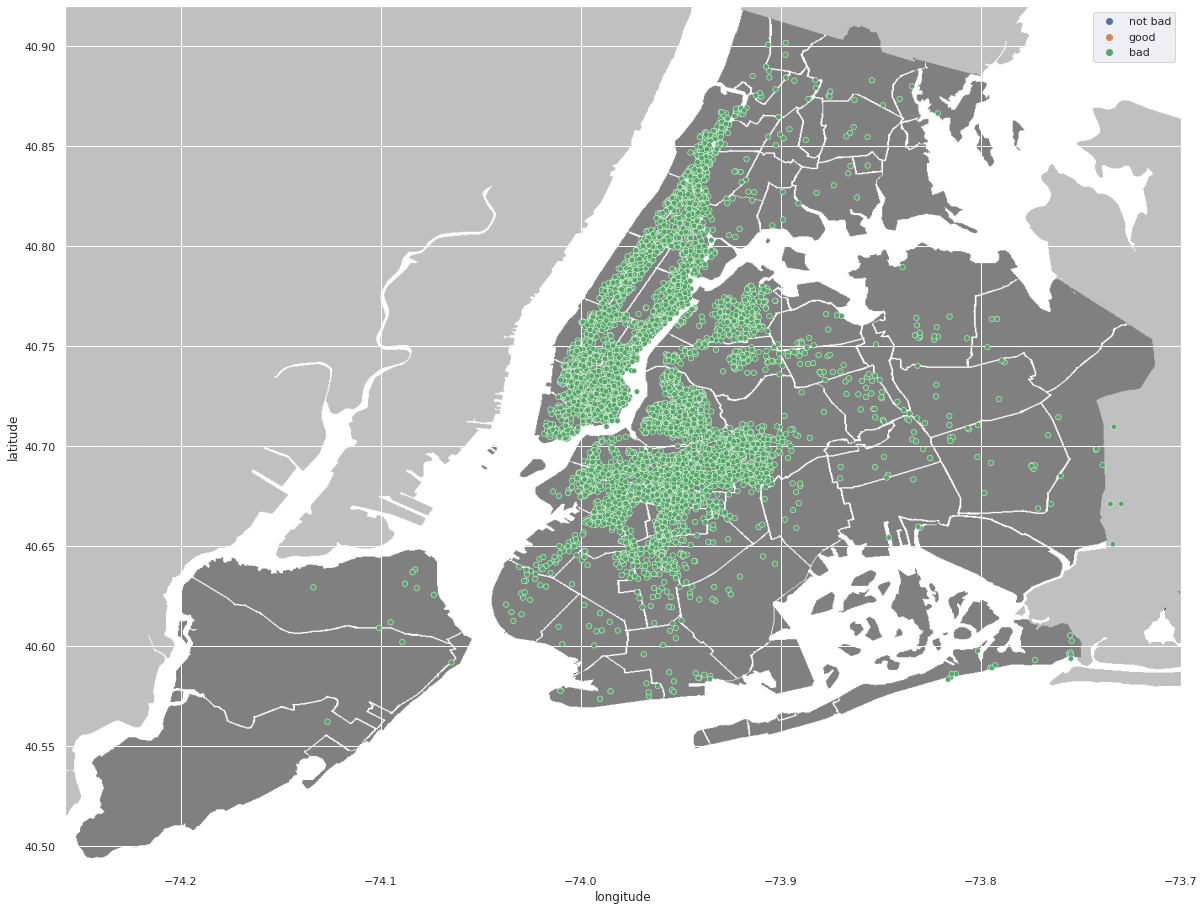

In [ ]:
plt.figure(figsize=(20,20))
pic=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(pic,zorder=0,extent=[-74.258, -73.7, 40.49, 40.92])
sb.scatterplot(x=data[(data['status']=='bad') ]['longitude'], y=data[data['status']!='good']['latitude'], hue='status',s=30, data=data)
plt.legend()
plt.show()

In [ ]:
data[["neighbourhood_group",'status']].groupby("status").describe()

neighbourhood_group                         
                      count unique        top   freq
status                                              
bad                    7448      5  Manhattan   3591
good                  32375      5  Manhattan  13689
not bad                5920      5   Brooklyn   2638

In [ ]:
data[["neighbourhood_group",'status']].groupby("neighbourhood_group").describe()

status                    
                     count unique   top   freq
neighbourhood_group                           
Bronx                 1034      3  good    862
Brooklyn             19221      3  good  13317
Manhattan            19830      3  good  13689
Queens                5304      3  good   4200
Staten Island          354      3  good    307

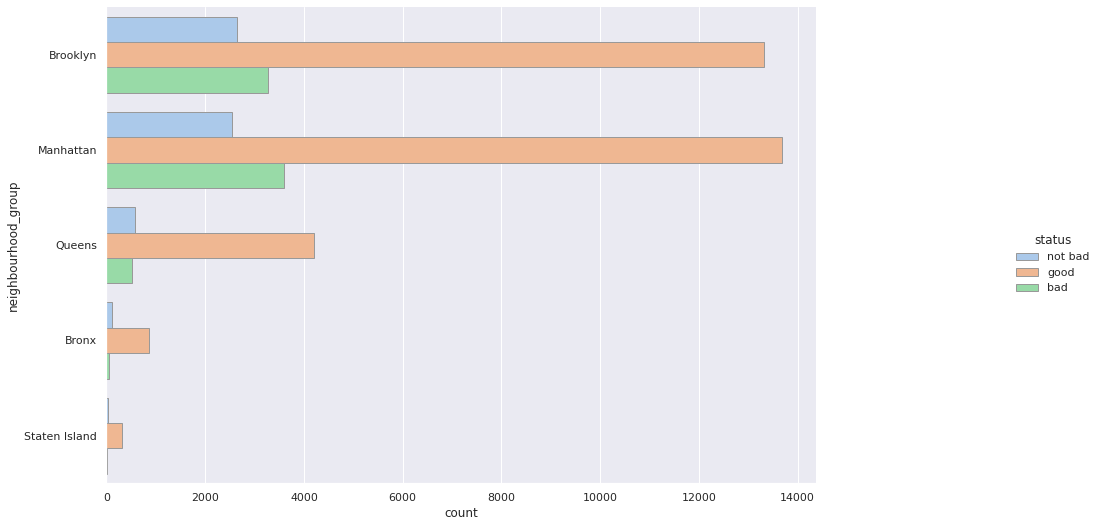

In [ ]:
sb.catplot(y="neighbourhood_group", hue="status", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.gcf().set_size_inches(20, 8)


In [ ]:
data[data['neighbourhood'] == 'Bedford-Stuyvesant']

id  ... status
6          5121  ...    bad
24         8490  ...   good
34        10452  ...   good
36        11452  ...   good
47        12940  ...   good
...         ...  ...    ...
48836  36451362  ...   good
48843  36453642  ...   good
48856  36457700  ...   good
48869  36474023  ...   good
48890  36484665  ...   good

[3520 rows x 19 columns]

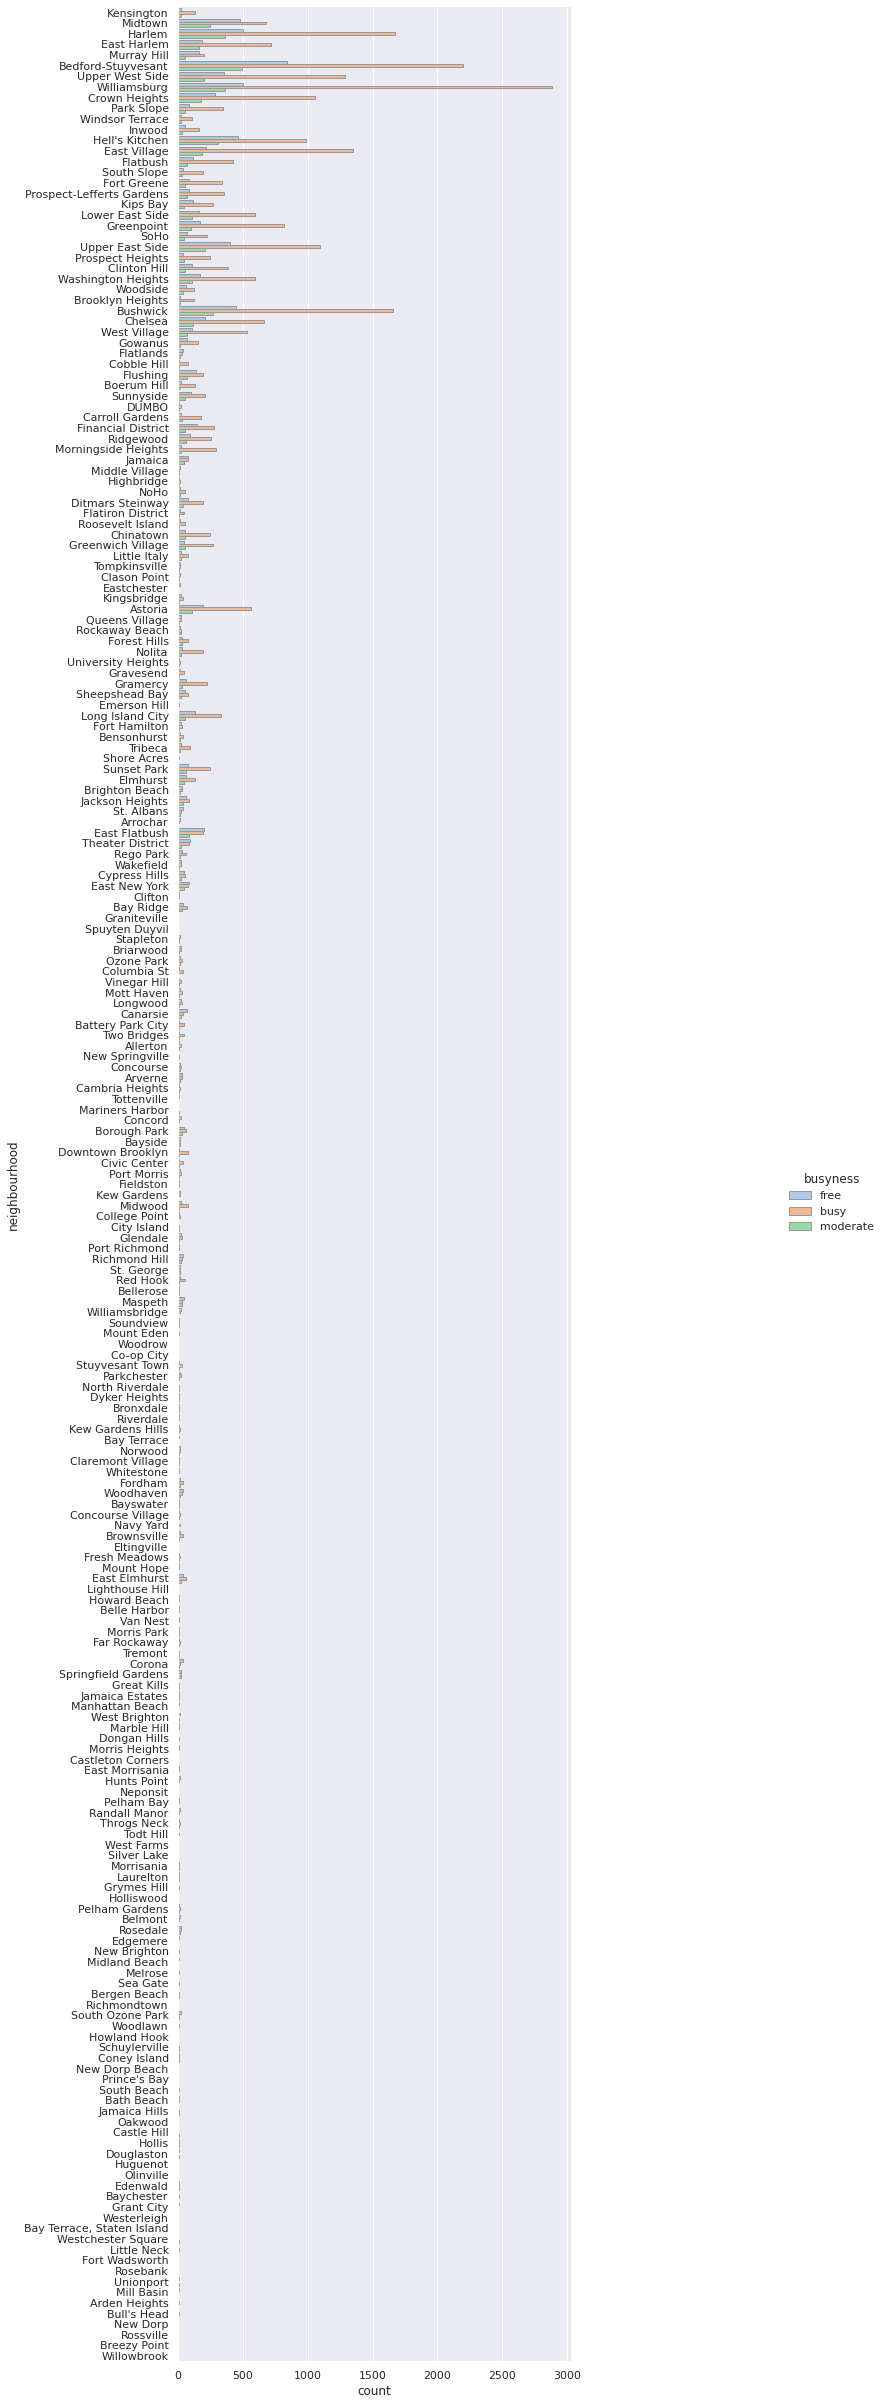

In [ ]:
sb.catplot(y="neighbourhood", hue="busyness", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
plt.gcf().set_size_inches(20, 40)


In [ ]:
newdf = pd.DataFrame()
newdf['neighbourhood_group'] = data['neighbourhood_group']
newdf['room_type'] = data['room_type']
newdf['price'] = data['price']
newdf['minimum_nights'] = data['minimum_nights']
newdf['number_of_reviews'] = data['number_of_reviews']
newdf['availability_365'] = data['availability_365']

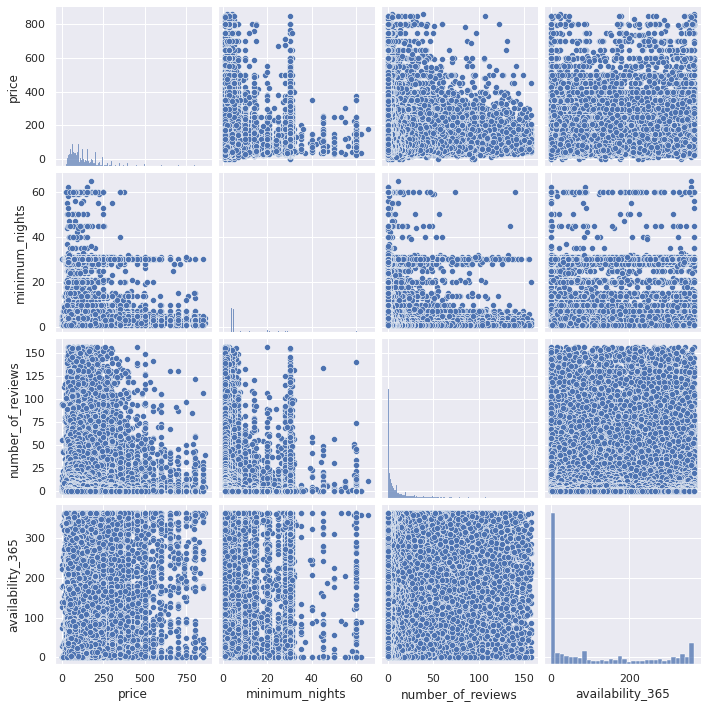

In [ ]:
sb.pairplot(newdf)
plt.show()

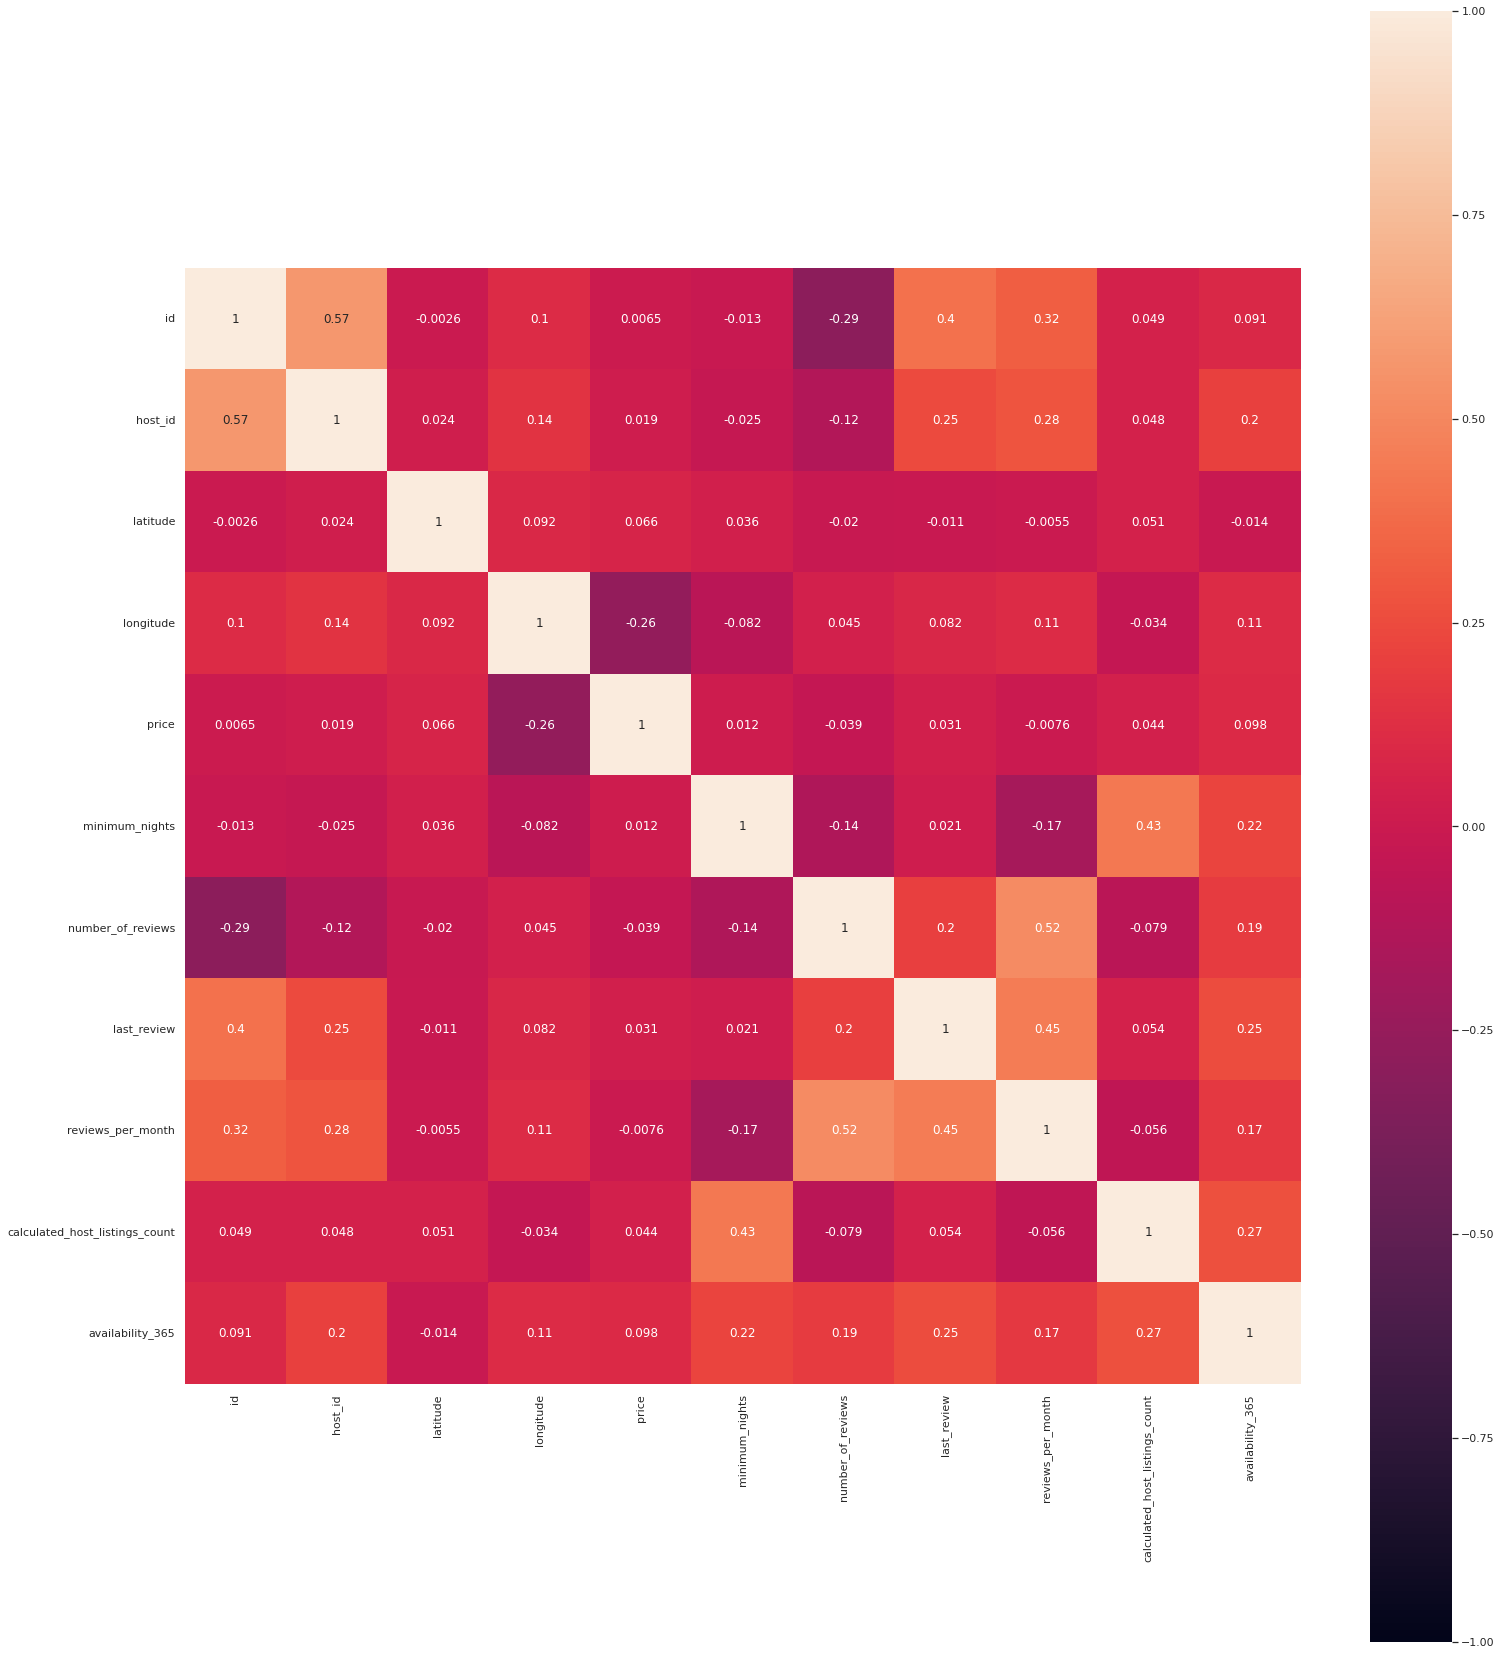

In [ ]:
corr = data.corr()
f , ax = plt.subplots(figsize=(25,30))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1,square=True,annot=True)
plt.show()

In [ ]:
table = pd.crosstab(data.neighbourhood_group, data.busyness)
chi2, p_value, dof, expected = stats.chi2_contingency(table.values)
print(chi2)
print(p_value)
print(dof)
print(expected)

699.129778920424
1.1016967393599007e-145
8
[[  670.31537066   227.35657915   136.32805019]
 [12460.47557003  4226.3257329   2534.19869707]
 [12855.27446822  4360.23304112  2614.49249065]
 [ 3438.44557637  1166.24690117   699.30752246]
 [  229.48901471    77.83774567    46.67323962]]
